In [1]:
from gensim.models import KeyedVectors
model = 'model_OTAR_200d-3mc-10it.bin'
w2v_path = '/home/stirunag/models/'+model

w2v = KeyedVectors.load_word2vec_format(w2v_path, binary=True)


In [50]:
w1 = "fibrosis"

print("Most similar to {0}".format(w1), w2v.most_similar(positive=w1))

Most similar to fibrosis [('fibrogenesis', 0.7683055996894836), ('Fibrosis', 0.7184053659439087), ('fibrotic', 0.6804704666137695), ('fibrosis-associated', 0.6651999354362488), ('fibrosis.Fig', 0.6215755343437195), ('steatosis', 0.604482889175415), ('fibrosis-related', 0.6008374691009521), ('hypertrophy', 0.599664568901062), ('profibrotic', 0.5795458555221558), ('emphysema', 0.5776185393333435)]


In [4]:
w1 = "k-ras"

print("Most similar to {0}".format(w1), w2v.wv.most_similar(positive=w1))

Most similar to k-ras [('K-ras', 0.7309122085571289), ('c-K-ras', 0.6795176863670349), ('KRAS2', 0.6488620042800903), ('Ki-ras', 0.645463228225708), ('braf', 0.6112059354782104), ('K-ras-2', 0.6089917421340942), ('c-Ki-ras', 0.608767032623291), ('K-RAS', 0.5830072164535522), ('H-ras', 0.5817062854766846), ('ras', 0.5777754783630371)]


/home/synoptica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
w1 = ""

print("Most similar to {0}".format(w1), w2v.wv.most_similar(positive=w1))

Most similar to Gene [('gene', 0.5835971236228943), ('Genes', 0.5810836553573608), ('Microarray', 0.5184320211410522), ('Genomic', 0.5101022720336914), ('5Gene', 0.4895184636116028), ('genes', 0.4875054359436035), ('Transcriptome', 0.4866756796836853), ('4Gene', 0.48663461208343506), ('6Gene', 0.4781171381473541), ('3Gene', 0.47550082206726074)]


/home/synoptica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
result = w2v.most_similar(positive=['cancer', 'TNF'], negative=['LOXL1'])
print("{}: {:.4f}".format(*result[0]))

GM-CSF: 0.4346


In [17]:
import nltk
from nltk.corpus import stopwords

def clean_my_text(full_text):
    # stopset = set(stopwords.words('english'))  # | set(string.punctuation)
    tokens = nltk.word_tokenize(full_text)
    cleanup = [token for token in tokens if len(token) > 2]
    return cleanup

In [47]:
sentence = 'To evaluate serum glutathione S-transferase B1 (GST B1), a highly sensitive test of hepatocellular function, as a means of identifying liver disease in patients with cystic fibrosis (CF).'
w2v.doesnt_match(clean_my_text(sentence))

'function'

In [55]:
keys = ['LOXL1', 'cancer', 'cystic']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(w2v[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
    
    

In [56]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


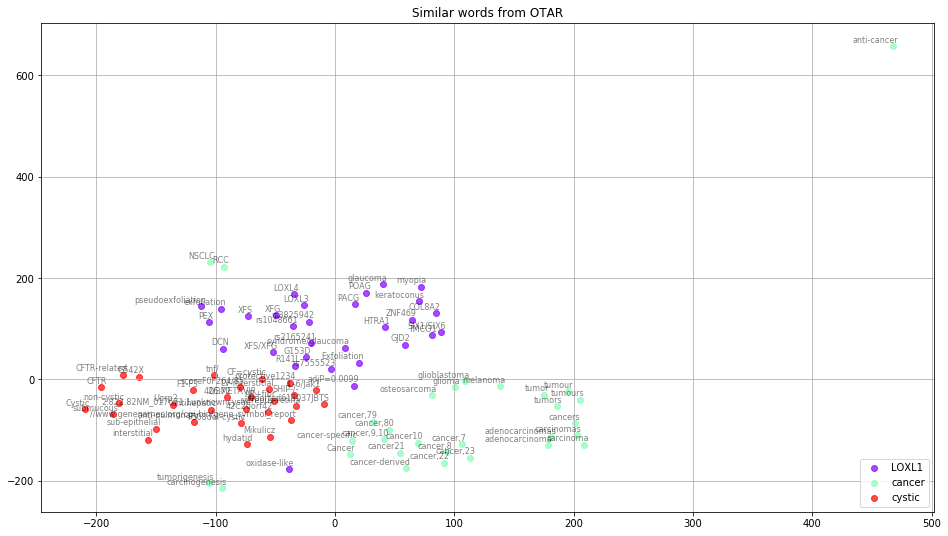

In [57]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from OTAR', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_OTAR.png')

In [26]:
from collections import defaultdict
import os

wordcount = defaultdict(int)

# get the current working directory and file
data_dir_path = '/home/stirunag/Dataset/'

for fname in os.listdir(data_dir_path):
    print(fname)
    for line in open(os.path.join(data_dir_path, fname), 'r', encoding='ISO-8859-1'):
        for word in clean_my_text(line):
            wordcount[word] += 1

OTAR_CSV-24-05-2019_split_9026.csv
OTAR_CSV-24-05-2019_split_48.csv
OTAR_CSV-24-05-2019_split_71.csv
OTAR_CSV-24-05-2019_split_9053.csv
OTAR_CSV-24-05-2019_split_51.csv
OTAR_CSV-24-05-2019_split_18.csv
OTAR_CSV-24-05-2019_split_40.csv
OTAR_CSV-24-05-2019_split_14.csv
OTAR_CSV-24-05-2019_split_34.csv
OTAR_CSV-24-05-2019_split_9049.csv
.~lock.OTAR_CSV-24-05-2019_split_00.csv#
OTAR_CSV-24-05-2019_split_9060.csv
OTAR_CSV-24-05-2019_split_23.csv
OTAR_CSV-24-05-2019_split_65.csv
OTAR_CSV-24-05-2019_split_9054.csv
OTAR_CSV-24-05-2019_split_9006.csv
OTAR_CSV-24-05-2019_split_76.csv
OTAR_CSV-24-05-2019_split_9052.csv
OTAR_CSV-24-05-2019_split_9002.csv
OTAR_CSV-24-05-2019_split_78.csv
OTAR_CSV-24-05-2019_split_46.csv
OTAR_CSV-24-05-2019_split_16.csv
OTAR_CSV-24-05-2019_split_53.csv
OTAR_CSV-24-05-2019_split_27.csv
OTAR_CSV-24-05-2019_split_9038.csv
OTAR_CSV-24-05-2019_split_50.csv
OTAR_CSV-24-05-2019_split_21.csv
OTAR_CSV-24-05-2019_split_9042.csv
OTAR_CSV-24-05-2019_split_61.csv
OTAR_CSV-24-05-

In [27]:
import itertools
import collections

w2cSorted=dict(sorted(wordcount.items(), key=lambda x: x[1],reverse=True))

In [28]:
x = itertools.islice(w2cSorted.items(), 0, 10)

for key, value in x:
    print(key, value)

and 21476684
the 17924754
with 7455075
that 4449218
cancer 3577534
for 3571588
cells 3523356
expression 3142300
was 2799352
patients 2594797


In [31]:
import csv
newFile = '/home/stirunag/TF.txt'

def makeFile(textSorted, newFile) :
    from collections import Counter
    with open(newFile, "w") as f:
        wr = csv.writer(f,delimiter=" ")
        wr.writerows(Counter(textSorted).items())
        
        
makeFile(w2cSorted, newFile)
